Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


Load Dataset

In [6]:
# Load the dataset
file_path = 'Core_bugs.csv'  # Update with your actual file path
df = pd.read_csv(file_path)
df.head()

,Summary,Issue id,Status,Priority,Resolution,Created,Resolved,Description
0,[macos] Save to PDF feature defaults filename ...,1606512,VERIFIED,P3,FIXED,2020-01-01 00:09:13+00:00,2020-05-21 09:15:39+00:00,Steps to reproduce: \n\n1. navigate to google....
1,"Hit MOZ_CRASH(ElementAt(aIndex = 0, aLength = ...",1606516,RESOLVED,P2,FIXED,2020-01-01 00:38:43+00:00,2022-06-06 16:29:50+00:00,Reduced with m-c:\nBuildID=20191231094349\nSou...
2,High frequency layout/style/test/test_mq_prefe...,1606525,RESOLVED,P5,FIXED,2020-01-01 01:19:11+00:00,2020-01-28 13:13:50+00:00,**Filed by:** rmaries [at] mozilla.com\n**Pars...
3,A window hang blocks entire browser. No matter...,1606529,UNCONFIRMED,P3,NaN,2020-01-01 02:53:38+00:00,2020-06-18 15:32:41+00:00,User Agent: Mozilla/5.0 (Windows NT 6.2; en-US...
4,Shadow DOM breaks contextmenu,1606533,UNCONFIRMED,P5,NaN,2020-01-01 06:18:04+00:00,2022-10-11 23:47:54+00:00,User Agent: Mozilla/5.0 (Windows NT 10.0; Win6...


Distribution of Key Attributes (Status, Priority, Resolution)

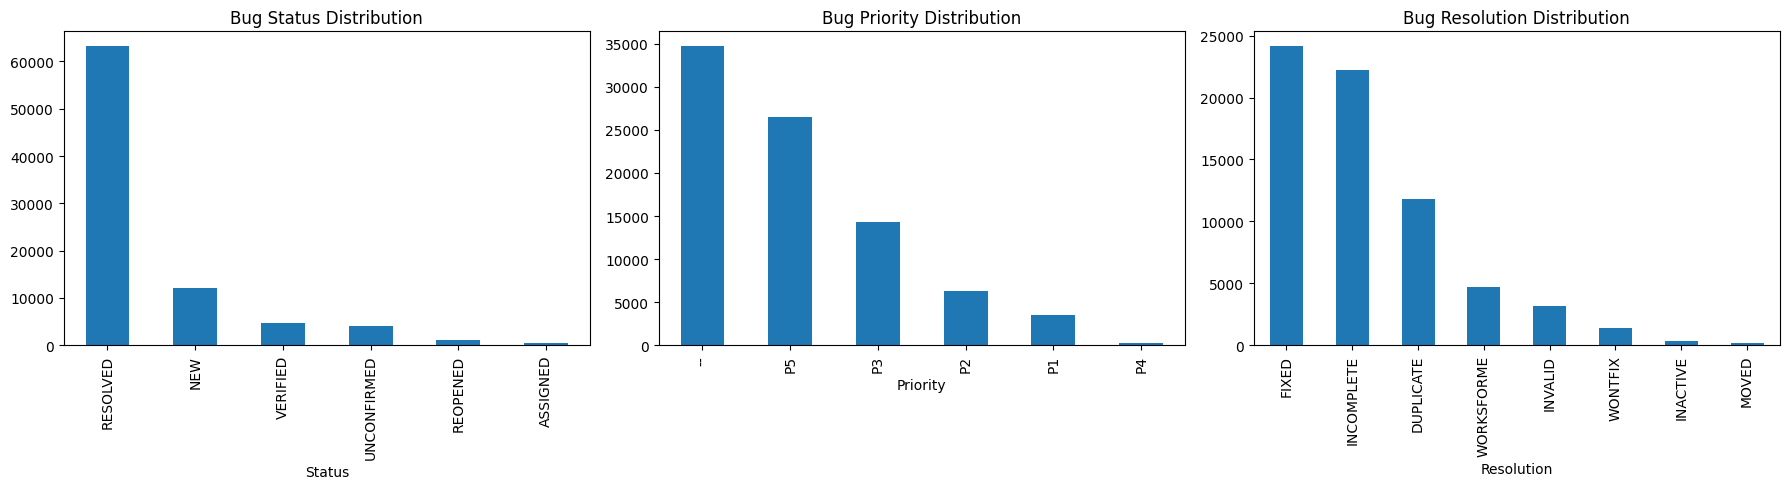

In [7]:
# Count plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bug Status Distribution
df['Status'].value_counts().plot(kind='bar', ax=axes[0], title='Bug Status Distribution')

# Bug Priority Distribution
df['Priority'].value_counts().plot(kind='bar', ax=axes[1], title='Bug Priority Distribution')

# Bug Resolution Distribution
df['Resolution'].value_counts().plot(kind='bar', ax=axes[2], title='Bug Resolution Distribution')

plt.tight_layout()
plt.show()


Temporal Analysis - Bug Reports Over Time

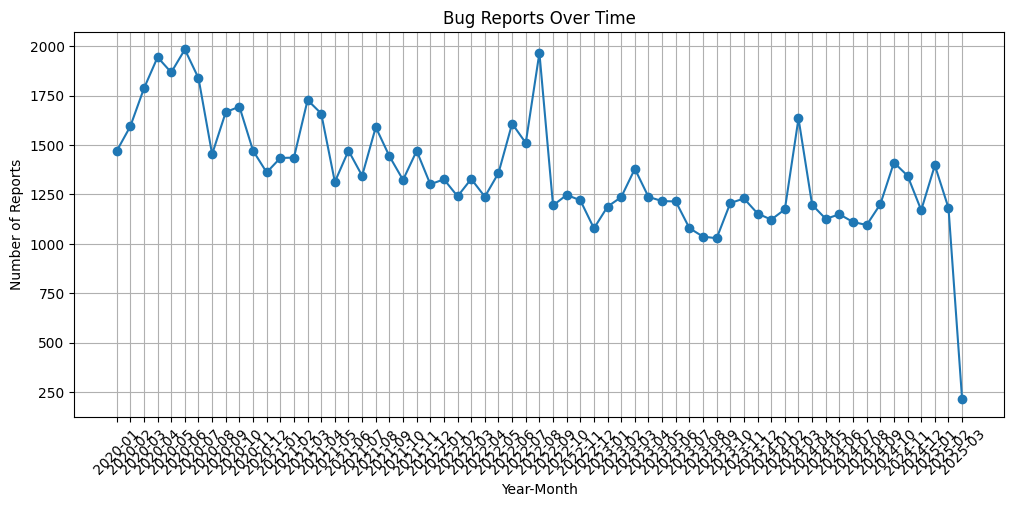

In [8]:
# Convert date columns
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
df['Resolved'] = pd.to_datetime(df['Resolved'], errors='coerce')

# Extract year-month
df['Created_YearMonth'] = df['Created'].dt.tz_localize(None).dt.to_period('M')
# df['Created_YearMonth'] = df['Created'].dt.to_period('M')

# Count bug reports per month
bug_report_trend = df['Created_YearMonth'].value_counts().sort_index()

# Plot bug report trends
plt.figure(figsize=(12, 5))
plt.plot(bug_report_trend.index.astype(str), bug_report_trend.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Bug Reports Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reports')
plt.grid()
plt.show()


Resolution Time Analysis

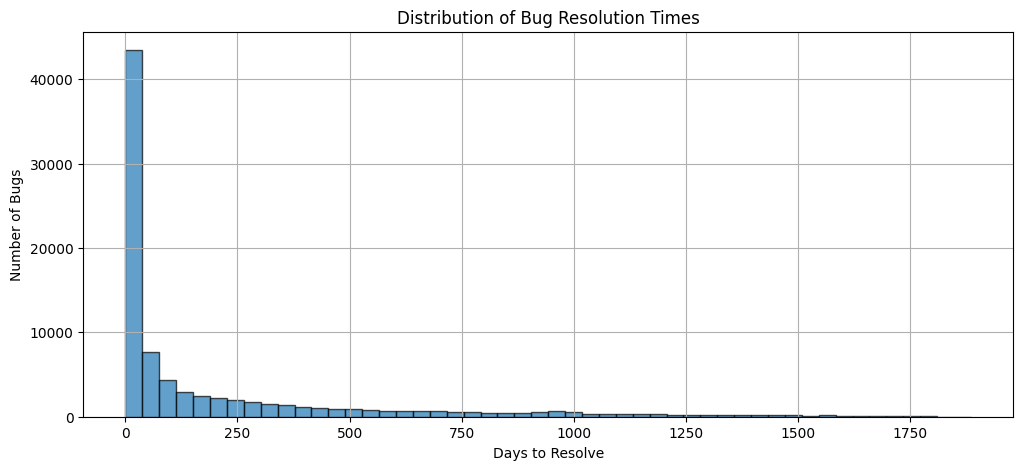

In [9]:
# Calculate resolution time
df['Resolution_Time'] = (df['Resolved'] - df['Created']).dt.days

# Plot distribution
plt.figure(figsize=(12, 5))
plt.hist(df['Resolution_Time'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bug Resolution Times')
plt.xlabel('Days to Resolve')
plt.ylabel('Number of Bugs')
plt.grid()
plt.show()


Word Cloud for Bug Descriptions
python
Copy
Edit


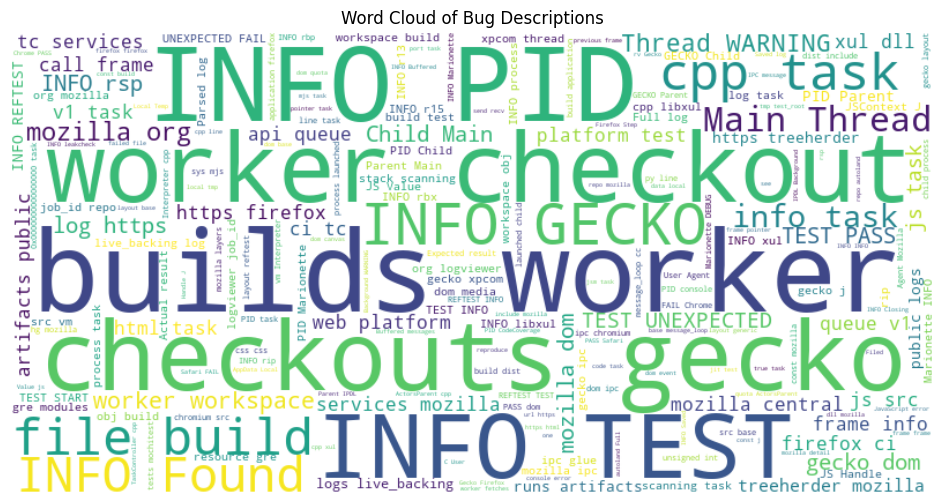

In [10]:
# Word Cloud for bug descriptions
text_data = ' '.join(str(desc) for desc in df['Description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bug Descriptions')
plt.show()
